<a href="https://colab.research.google.com/github/moonsunkey/CryptoClustering/blob/main/Data_cleaning_Nielsen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# prompt: read csv

import pandas as pd
df = pd.read_csv('WFM_07_13_2024.csv')
print(df.head())


   PERIOD SUPER CATEGORY              CATEGORY SUB CATEGORY      SEGMENT  \
0    52.0            HBL  ECZEMA AND PSORIASIS       ECZEMA  COMBINATION   
1    52.0            HBL  ECZEMA AND PSORIASIS       ECZEMA  COMBINATION   
2    52.0            HBL  ECZEMA AND PSORIASIS       ECZEMA          DRY   
3    52.0            HBL  ECZEMA AND PSORIASIS       ECZEMA          DRY   
4    52.0            HBL  ECZEMA AND PSORIASIS       ECZEMA          DRY   

                 MANUFACTURER  \
0  ADVANTAGE BRANDS GROUP INC   
1        BABO BOTANICALS, LLC   
2      BOERICKE & TAFEL, INC.   
3   ESSENCETREE HOLISTIC LIFE   
4            EULACTOL USA INC   

                                               BRAND         $      $ YA  \
0               BOGAVIA (ADVANTAGE BRANDS GROUP INC)      $179    $2,153   
1             BABO BOTANICALS (BABO BOTANICALS, LLC)  $301,779  $271,463   
2                       B&T (BOERICKE & TAFEL, INC.)  $223,212  $193,987   
3  ESSENCETREE HOLISTIC LIFE (ESSENCETRE

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PERIOD                       7189 non-null   float64
 1   SUPER CATEGORY               7189 non-null   object 
 2   CATEGORY                     7189 non-null   object 
 3   SUB CATEGORY                 7189 non-null   object 
 4   SEGMENT                      7189 non-null   object 
 5   MANUFACTURER                 7189 non-null   object 
 6   BRAND                        7189 non-null   object 
 7   $                            6051 non-null   object 
 8   $ YA                         6865 non-null   object 
 9   Base $                       6051 non-null   object 
 10  Base $ YA                    6865 non-null   object 
 11  Incr $                       6051 non-null   object 
 12  Incr $ YA                    6865 non-null   object 
 13  $ % Lift          

In [9]:
# Define numeric columns
numeric_columns = [
    '$', '$ YA', 'Base $', 'Base $ YA', 'Incr $', 'Incr $ YA', '$ % Lift', '$ % Lift YA',
    'Units', 'Units YA', 'Base Units', 'Base Units YA', 'Incr Units', 'Incr Units YA',
    'Units % Lift', 'Units % Lift YA', '%ACV Reach', '%ACV Reach YA', '%ACV', '%ACV YA',
    'TDP', 'TDP YA', '$ / $MM ACV', '$ / $MM ACV YA', '$ / %ACV', '$ / %ACV YA', 'Any Promo $',
    'Any Promo $ YA', 'No Promo $', 'No Promo $ YA', 'Avg Unit Price', 'Avg Unit Price YA',
    'Base Unit Price', 'Base Unit Price YA', 'Any Promo Unit Price', 'Any Promo Unit Price YA',
    'No Promo Unit Price', 'No Promo Unit Price YA'
]

# Filter numeric columns to those present in the DataFrame
numeric_columns = [col for col in numeric_columns if col in df.columns]

# Convert to numeric, handling commas, dollar signs, and non-numeric characters
for col in numeric_columns:
    if df[col].dtype == 'object':  # Check if the column is of string type
        df[col] = df[col].str.replace(',', '').str.replace('$', '').str.replace(r'[^\d\.]+', '', regex=True)  # Remove commas, dollar signs, and non-numeric characters
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coercing errors to NaN

# Handle missing values
df[numeric_columns] = df[numeric_columns].fillna(0)  # Fill with 0, or use another method (e.g., interpolate, mean, etc.)

# Handle 'PERIOD' separately if it's categorical or time-based
if 'PERIOD' in df.columns:
    df['PERIOD'] = df['PERIOD'].fillna(df['PERIOD'].mode()[0])

# For categorical columns, fill with mode
categorical_columns = ['SUPER CATEGORY', 'CATEGORY', 'SUB CATEGORY', 'SEGMENT', 'MANUFACTURER', 'BRAND']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Convert date columns to datetime if any
date_columns = ['First Wk Selling']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Export the DataFrame to a CSV file
file_path = 'cleaned_data.csv'
df.to_csv(file_path, index=False)

print(f'DataFrame exported to {file_path}')
print(df.head())

DataFrame exported to cleaned_data.csv
   PERIOD SUPER CATEGORY              CATEGORY SUB CATEGORY      SEGMENT  \
0    52.0            HBL  ECZEMA AND PSORIASIS       ECZEMA  COMBINATION   
1    52.0            HBL  ECZEMA AND PSORIASIS       ECZEMA  COMBINATION   
2    52.0            HBL  ECZEMA AND PSORIASIS       ECZEMA          DRY   
3    52.0            HBL  ECZEMA AND PSORIASIS       ECZEMA          DRY   
4    52.0            HBL  ECZEMA AND PSORIASIS       ECZEMA          DRY   

                 MANUFACTURER  \
0  ADVANTAGE BRANDS GROUP INC   
1        BABO BOTANICALS, LLC   
2      BOERICKE & TAFEL, INC.   
3   ESSENCETREE HOLISTIC LIFE   
4            EULACTOL USA INC   

                                               BRAND         $      $ YA  \
0               BOGAVIA (ADVANTAGE BRANDS GROUP INC)     179.0    2153.0   
1             BABO BOTANICALS (BABO BOTANICALS, LLC)  301779.0  271463.0   
2                       B&T (BOERICKE & TAFEL, INC.)  223212.0  193987.0   
3

In [10]:
# Export the DataFrame to a CSV file
file_path = 'cleaned_data.csv'
df.to_csv(file_path, index=False)

print(f'DataFrame exported to {file_path}')
print(df.head())

DataFrame exported to cleaned_data.csv
   PERIOD SUPER CATEGORY              CATEGORY SUB CATEGORY      SEGMENT  \
0    52.0            HBL  ECZEMA AND PSORIASIS       ECZEMA  COMBINATION   
1    52.0            HBL  ECZEMA AND PSORIASIS       ECZEMA  COMBINATION   
2    52.0            HBL  ECZEMA AND PSORIASIS       ECZEMA          DRY   
3    52.0            HBL  ECZEMA AND PSORIASIS       ECZEMA          DRY   
4    52.0            HBL  ECZEMA AND PSORIASIS       ECZEMA          DRY   

                 MANUFACTURER  \
0  ADVANTAGE BRANDS GROUP INC   
1        BABO BOTANICALS, LLC   
2      BOERICKE & TAFEL, INC.   
3   ESSENCETREE HOLISTIC LIFE   
4            EULACTOL USA INC   

                                               BRAND         $      $ YA  \
0               BOGAVIA (ADVANTAGE BRANDS GROUP INC)     179.0    2153.0   
1             BABO BOTANICALS (BABO BOTANICALS, LLC)  301779.0  271463.0   
2                       B&T (BOERICKE & TAFEL, INC.)  223212.0  193987.0   
3

<ipython-input-11-5a3f1348e4b5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunscreen_data['Dollar Change'] = sunscreen_data['$'] - sunscreen_data['$ YA']


Top 10 Growing Brands:
                                         BRAND  Dollar Change  Any Promo $  \
20                               PRIVATE LABEL       504977.0    1072995.0   
3             BADGER (W.S. BADGER COMPANY INC)       224726.0    1089935.0   
17                     MAD HIPPIE (MAD HIPPIE)       178107.0     218374.0   
29           THINKSPORT (THINK OPERATIONS LLC)       118888.0     486782.0   
31                           TRILOGY (TRILOGY)        57500.0      13231.0   
24         SOLARA SUNCARE (SOLARA SUNCARE INC)        33345.0      16545.0   
2       BABO BOTANICALS (BABO BOTANICALS, LLC)        33141.0    1111176.0   
23  SEAWEED BATH CO. (THE SEAWEED BATH CO LLC)        10437.0     778771.0   
5                   BURT'S (BURT'S BEES, INC.)         9598.0      33407.0   
28            THINKBABY (THINK OPERATIONS LLC)         7495.0     422702.0   

    No Promo $       %ACV  
20    686497.0  56.666667  
3     415213.0  35.600000  
17    212013.0  30.350000  
29    

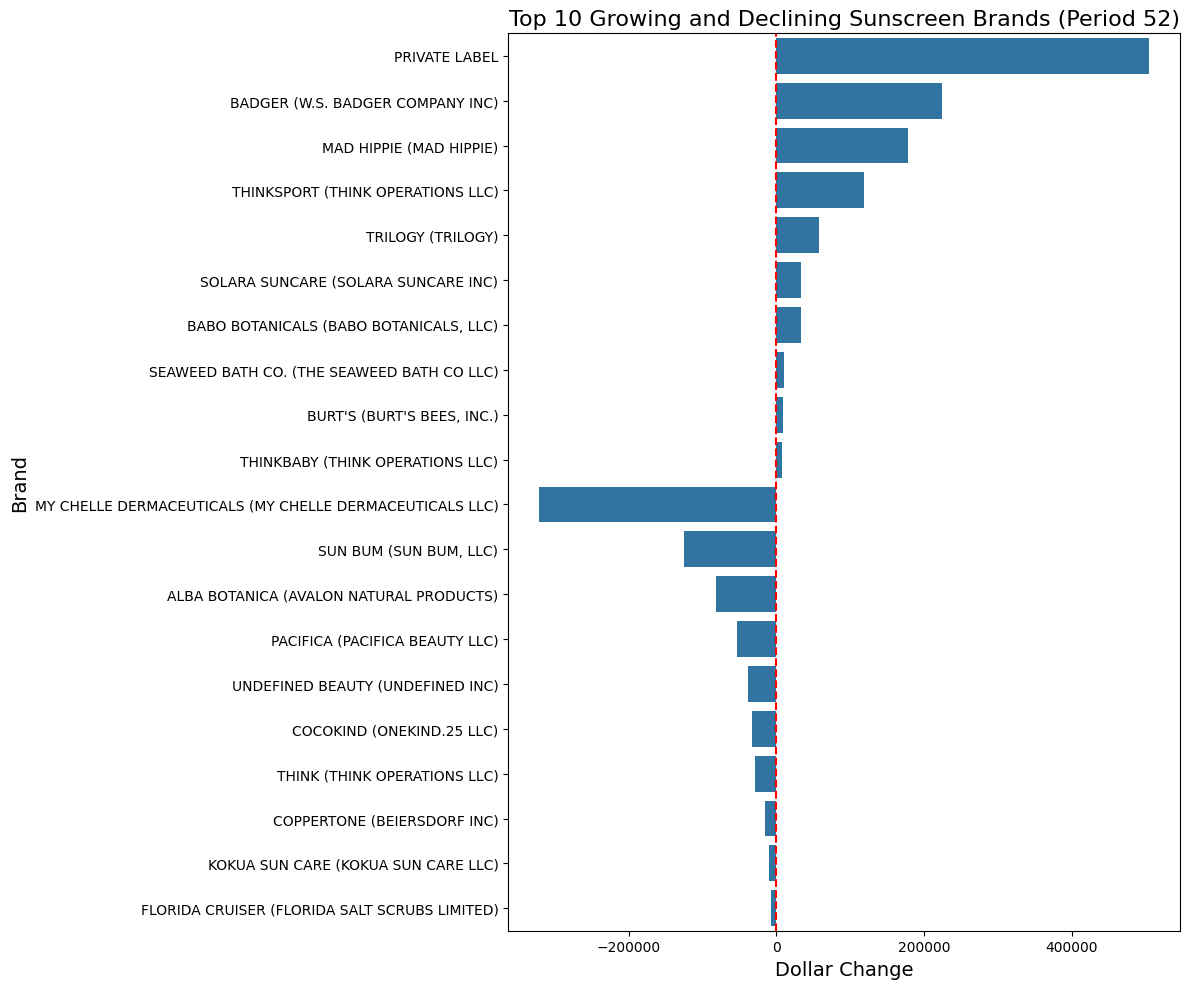

Visualization for sunscreen brands dollar change created.


In [11]:

import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
new_data = df.copy()
# Filter the dataset for the sunscreen category and period 52
sunscreen_data = new_data[(new_data['CATEGORY'] == 'SUNSCREEN') & (new_data['PERIOD'] == 52)]

# Calculate dollar changes
sunscreen_data['Dollar Change'] = sunscreen_data['$'] - sunscreen_data['$ YA']

# Sort brands by dollar change
brand_growth = sunscreen_data.groupby('BRAND').agg({
    'Dollar Change': 'sum',
    'Any Promo $': 'sum',
    'No Promo $': 'sum',
    '%ACV': 'mean'  # Using mean for distribution
}).reset_index()

# Sort by Dollar Change
brand_growth = brand_growth.sort_values('Dollar Change', ascending=False)

# Display top 10 growing and top 10 declining brands
top_growing = brand_growth.head(10)
top_declining = brand_growth.tail(10).sort_values('Dollar Change')

print("Top 10 Growing Brands:")
print(top_growing)
print("\nTop 10 Declining Brands:")
print(top_declining)

# Visualization
plt.figure(figsize=(12, 10))
sns.barplot(x='Dollar Change', y='BRAND', data=pd.concat([top_growing, top_declining]))
plt.title('Top 10 Growing and Declining Sunscreen Brands (Period 52)', fontsize=16)
plt.xlabel('Dollar Change', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.axvline(x=0, color='r', linestyle='--')  # Add a vertical line at 0
plt.tight_layout()
plt.savefig('sunscreen_brands_dollar_change.png')
plt.show()

print('Visualization for sunscreen brands dollar change created.')

In [12]:
# Create a new DataFrame with the relevant columns for the top growing and declining brands
final_brands_data = pd.concat([top_growing, top_declining])[["BRAND", "Dollar Change", "Any Promo $", "No Promo $", "%ACV"]]

# Save the DataFrame to a CSV file
final_brands_data.to_csv('sunscreen_brands_analysis.csv', index=False)

print('CSV file with brands, promotions, and distribution saved as sunscreen_brands_analysis.csv.')

CSV file with brands, promotions, and distribution saved as sunscreen_brands_analysis.csv.
